1. Load Dataset

In [1]:
# import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, TensorDataset
import torchvision.transforms as transforms
from tqdm.notebook import tqdm
import time

Load training data

In [ ]:

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

cifar_dir = "/Users/carinayan/Downloads/deep-learning-spring-2025-project-1/cifar-10-python/cifar-10-batches-py"  # 你的 CIFAR-10 数据集目录
meta_data = unpickle(os.path.join(cifar_dir, 'batches.meta'))
label_names = [name.decode("utf-8") for name in meta_data[b'label_names']]  # 解析类别名称

print(label_names)


['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


training dataset shape: (10000, 32, 32, 3)
training label shape: (10000,)


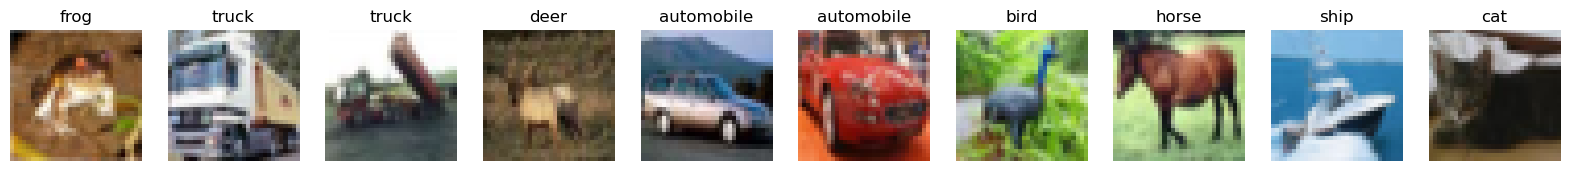

✅ Labels for first 10 images: ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


In [5]:

# load `data_batch_1`
batch_dict = unpickle(os.path.join(cifar_dir, "data_batch_1"))
train_images = batch_dict[b'data']
train_labels = batch_dict[b'labels']

train_images = train_images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)  # (10000, 32, 32, 3)
train_labels = np.array(train_labels)  # (10000,)

print("training dataset shape:", train_images.shape)  # (10000, 32, 32, 3)
print("training label shape:", train_labels.shape)  # (10000,)

# show first 10 imanges
plt.figure(figsize=(20, 4))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(train_images[i])
    plt.title(label_names[train_labels[i]])  # get labels
    plt.axis('off')

plt.show()

print("✅ Labels for first 10 images:", [label_names[label] for label in train_labels[:10]])
